DOHMH New York City Restaurant Inspection

In [219]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import choroplethNYC as cp
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.ticker as mtick
from matplotlib import rcParams
%matplotlib inline

In [41]:
!curl https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD > rest_inspect.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  133M    0  133M    0     0  5038k      0 --:--:--  0:00:27 --:--:-- 5172k


In [2]:
df = pd.read_csv("rest_inspect.csv")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = df.dropna(subset=['ZIPCODE','SCORE'])

In [4]:
df['ZIPCODE'] = df['ZIPCODE'].astype('int64')

In [6]:
df.shape

(360472, 18)

In [7]:
df.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')

In [8]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
GRADE DATE,172631,47.890266
GRADE,170082,47.183138
VIOLATION DESCRIPTION,2332,0.646930
VIOLATION CODE,1449,0.401973
BUILDING,216,0.059921
PHONE,23,0.006381
INSPECTION TYPE,0,0.000000
DBA,0,0.000000
BORO,0,0.000000
STREET,0,0.000000


46.9% grade are missing, use the score for analysis instead.

In [9]:
df.SCORE.describe()

count    360472.000000
mean         19.816979
std          14.171533
min          -1.000000
25%          11.000000
50%          15.000000
75%          25.000000
max         156.000000
Name: SCORE, dtype: float64

In [10]:
df.GRADE.value_counts()

A                 150921
B                  23941
C                   7938
Z                   2754
Not Yet Graded      2553
P                   2276
G                      7
Name: GRADE, dtype: int64

In [11]:
df.drop(df[df['GRADE'] == 'P'].index, inplace=True)
df.drop(df[df['GRADE'] == 'G'].index, inplace=True)
df.drop(df[df['GRADE'] == 'Z'].index, inplace=True)
df.loc[(df['SCORE'] >= 0.0) & (df['SCORE'] <= 13.0), ['GRADE']] = 'A'
df.loc[(df['SCORE'] >= 14.0) & (df['SCORE'] <= 27.0), ['GRADE']] = 'B'
df.loc[(df['SCORE'] >= 28.0), ['GRADE']] = 'C'

In [12]:
df.GRADE.value_counts()

A    171797
B    110379
C     73190
Name: GRADE, dtype: int64

In [13]:
df.BORO.value_counts()

MANHATTAN        140930
BROOKLYN          89966
QUEENS            80263
BRONX             31674
STATEN ISLAND     12459
Missing             143
Name: BORO, dtype: int64

In [14]:
df.loc[df['ZIPCODE'] == 11249.0,['BORO']] = 'BROOKLYN'
df.loc[df['ZIPCODE'] == 10270.0,['BORO']] = 'MANHATTAN'
df.loc[df['ZIPCODE'] == 10281.0,['BORO']] = 'MANHATTAN'
df.loc[df['ZIPCODE'] == 10168.0,['BORO']] = 'MANHATTAN'
df.loc[df['ZIPCODE'] == 10285.0,['BORO']] = 'MANHATTAN'

In [15]:
df.BORO.value_counts()

MANHATTAN        140973
BROOKLYN          90066
QUEENS            80263
BRONX             31674
STATEN ISLAND     12459
Name: BORO, dtype: int64

Text(0.5,0,'Score')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


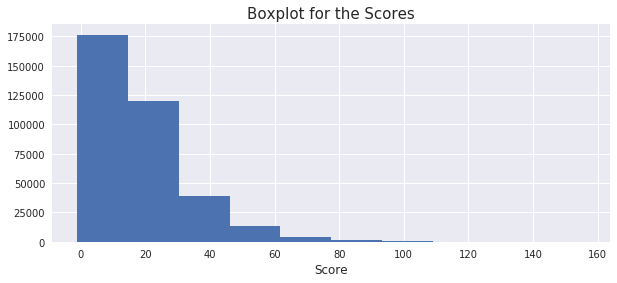

In [16]:
df.SCORE.hist(figsize=(10,4))
plt.title("Boxplot for the Scores", fontsize=15)
plt.xlabel('Score', fontsize = 12)


#### Score insight

In [64]:
df['GRADE DATE'] = pd.to_datetime(df['GRADE DATE'])

In [74]:
uniquedf = df.drop_duplicates(subset=['CAMIS','GRADE DATE'])

Text(0,0.5,'Percentage(%)')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


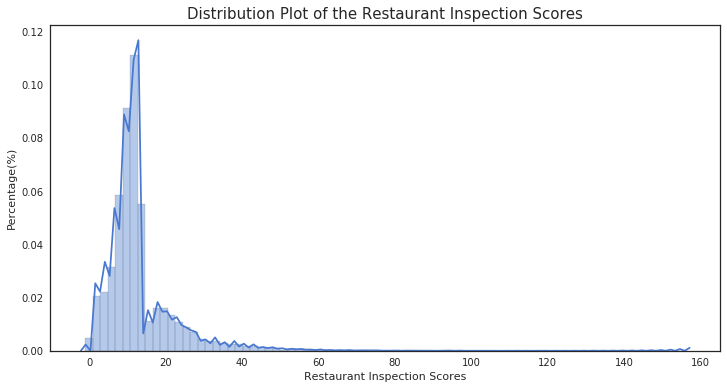

In [230]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
rcParams['patch.force_edgecolor'] = True
rcParams['patch.facecolor'] = 'b'
#sns.set(style="white", palette="muted", color_codes=True)
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.distplot(uniquedf.SCORE.dropna(),bins=80)
plt.title("Distribution Plot of the Restaurant Inspection Scores", fontsize=15)
ax.set_xlabel("Restaurant Inspection Scores")
ax.set_ylabel("Percentage(%)")

Text(0.5,1,'Violin plot of the Scores')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


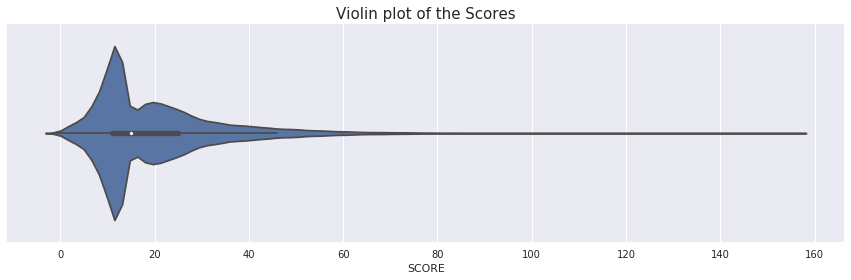

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.violinplot(df.SCORE.dropna())
plt.title("Violin plot of the Scores", fontsize=15)

Text(0.5,0,'Grades')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


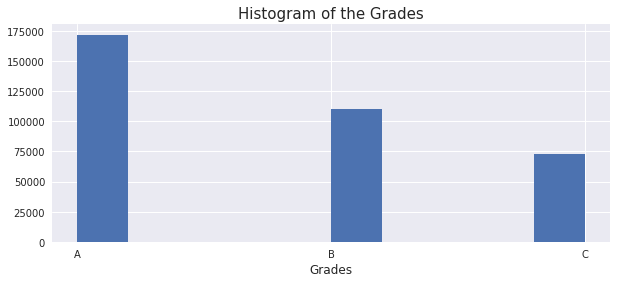

In [20]:
df.GRADE.hist(figsize = (10, 4))
plt.title("Histogram of the Grades", fontsize=15)
plt.xlabel('Grades', fontsize = 12)

#### Borough insight

Text(0.5,0,'Borough')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


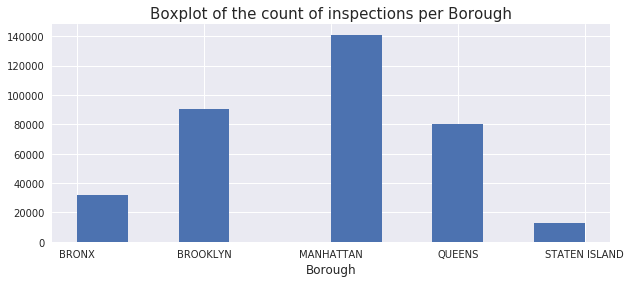

In [21]:
df.BORO.hist(figsize = (10, 4))
plt.title('Boxplot of the count of inspections per Borough', fontsize = 15)
plt.xlabel('Borough', fontsize = 12)


In [22]:
boro_grade = pd.crosstab(df.GRADE, df.BORO, margins = True)
boro_grade

BORO,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,All
GRADE,,,,,,
A,15545,43016,67557,39862,5817,171797
B,9803,27924,44057,24447,4148,110379
C,6320,19123,29321,15936,2490,73190
All,31668,90063,140935,80245,12455,355366


Text(0.5,1,'Grade Distribution by Borough')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


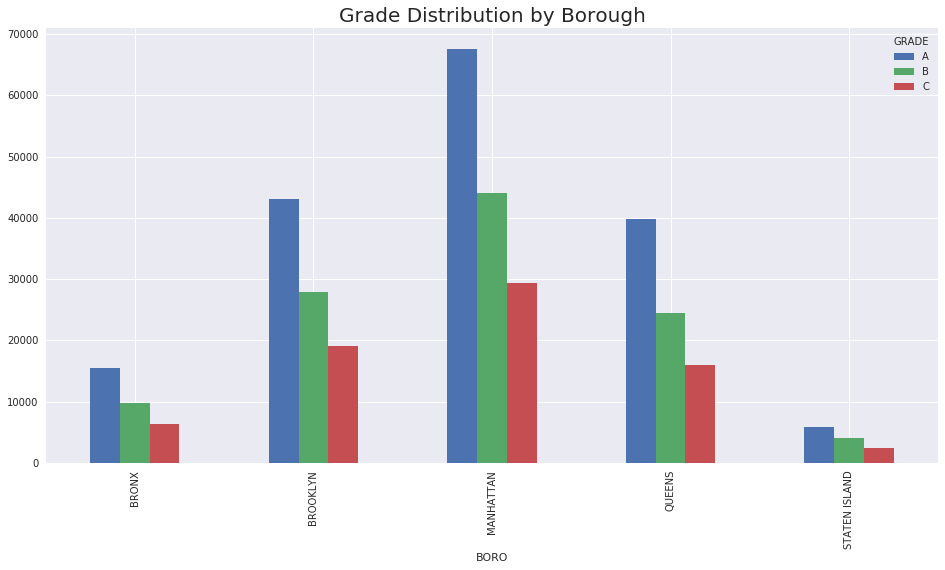

In [132]:
pd.crosstab(df.BORO, df.GRADE).plot(kind="bar", figsize=(16,8))
plt.title('Grade Distribution by Borough', fontsize = 20)

The majority of the inspections  are  in A in all the boroughs.

In [33]:
top_15 = ['American', 
'Chinese',                                                             
'CafÃ©/Coffee/Tea',                                                    
'Pizza',                                                               
'Latin (Cuban, Dominican, Puerto Rican, South & Central American)',    
'Italian',                                                             
'Mexican',
'Japanese',                                                            
'Caribbean',                                                           
'Bakery',                                                              
'Spanish',                                                             
'Pizza/Italian',                                                        
'Chicken',                                                              
'Indian',                                                               
'Delicatessen']

In [45]:
top_cuisine = df[df['CUISINE DESCRIPTION'].isin(top_15)]

In [109]:
top = top_cuisine[['CUISINE DESCRIPTION','GRADE']]

In [173]:
cuisine = pd.crosstab(top_cuisine['CUISINE DESCRIPTION'], top_cuisine.GRADE)

In [174]:
cuisine['total'] = cuisine['A'] + cuisine['B'] + cuisine['C']

In [175]:
cuisine['A'] = cuisine['A'] / cuisine['total'] *100
cuisine['B'] = cuisine['B'] / cuisine['total'] *100
cuisine['C'] = cuisine['C'] / cuisine['total'] *100

In [176]:
cuisine = cuisine.drop(['total'],axis=1)

In [177]:
cuisine

GRADE,A,B,C
CUISINE DESCRIPTION,,,
American,52.126030,29.996202,17.877768
Bakery,48.304929,32.123878,19.571193
CafÃ©/Coffee/Tea,60.081175,24.274800,15.644025
Caribbean,39.412094,35.410177,25.177730
Chicken,52.897521,28.296226,18.806253
Chinese,44.412798,31.319208,24.267994
Delicatessen,39.847408,35.044217,25.108375
Indian,38.360129,31.639871,30.000000
Italian,49.266520,31.676721,19.056759


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


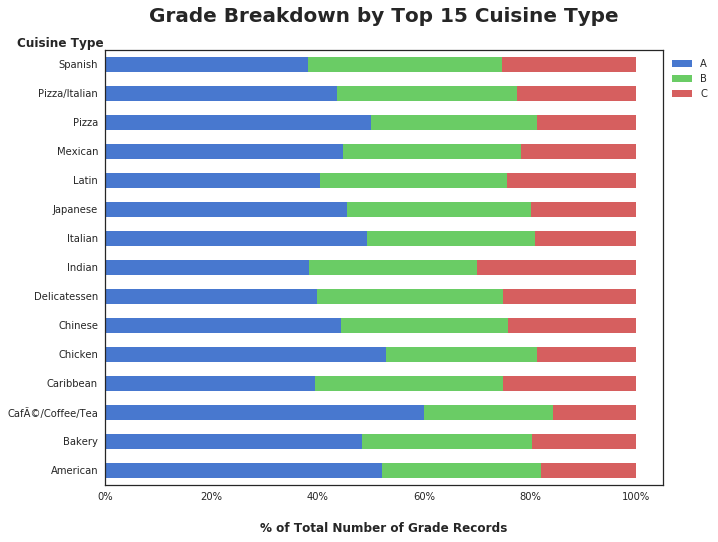

In [213]:
ax = cuisine.plot.barh(stacked=True, figsize=(10,8), width=0.5,edgecolor='none')
ax.legend(bbox_to_anchor=(1,1))
fmt = '%.0f%%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)
ax.set_title("Grade Breakdown by Top 15 Cuisine Type", weight='bold', size=20, y=1.05)
ax.set_xlabel("% of Total Number of Grade Records", labelpad=20,weight='bold', size=12, rotation=0)
ax.set_ylabel("Cuisine Type", labelpad=0,weight='bold', size=12,rotation=0)
ax.yaxis.set_label_coords(-0.08, 1)

In [129]:
#top.groupby(['CUISINE DESCRIPTION','GRADE']).size()

In [46]:
top_cuisine.loc[top_cuisine['CUISINE DESCRIPTION'] == 'Latin (Cuban, Dominican, Puerto Rican, South & Central American)', 'CUISINE DESCRIPTION'] = 'Latin'


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [214]:
#pd.crosstab(top_cuisine['CUISINE DESCRIPTION'], top_cuisine.GRADE).plot(kind="bar", fontsize = 20,figsize=(20,10))
#plt.title('Grade Distribution of Top 10 Cuisine Types', fontsize = 20)
#plt.xlabel('Cuisine type', fontsize=20)
#plt.ylabel('Number of Grade A, B, C',fontsize=20)

violcation density

Text(0.5,1,'Violcation type by Borough')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


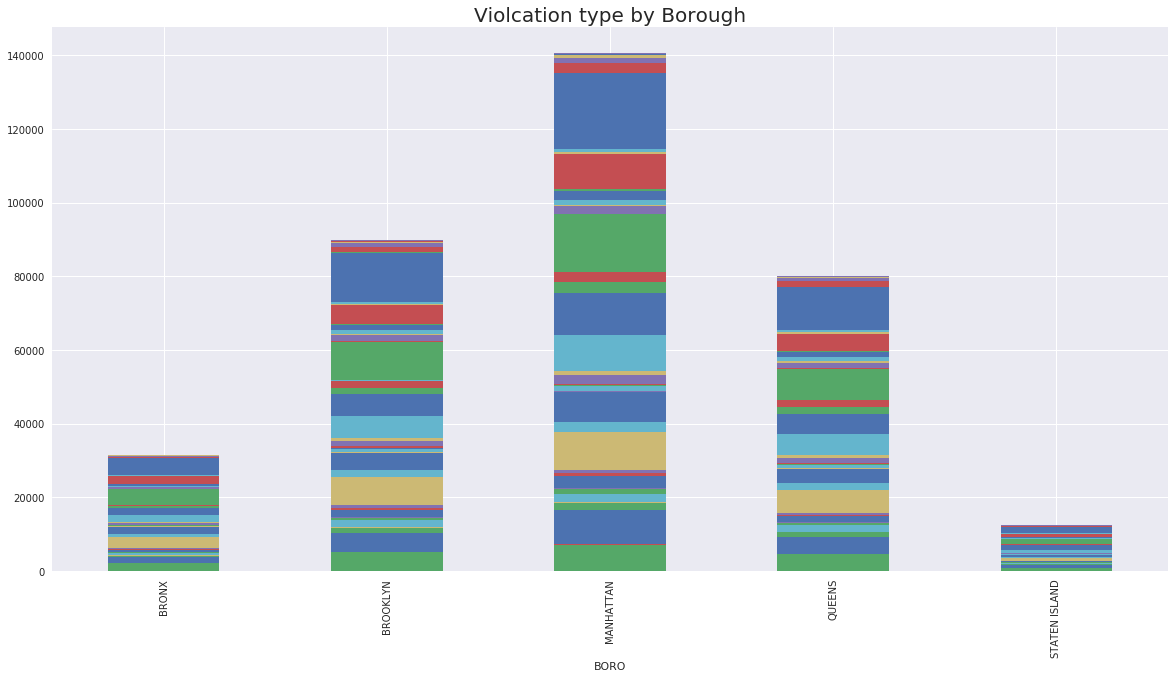

In [133]:
pd.crosstab(df.BORO,df['VIOLATION CODE']).plot(kind="bar",figsize=(20,10),stacked=True,legend=False)
plt.title('Violcation type by Borough', fontsize = 20)

### below sections are not ready for the report/pre

In [123]:
df.to_csv('clean_inspection.csv')

In [120]:
df.head(3)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,05/11/2018,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,5.0,A,05/11/2018,04/23/2019,Cycle Inspection / Initial Inspection
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,05/11/2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,5.0,A,05/11/2018,04/23/2019,Cycle Inspection / Initial Inspection
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,05/18/2017,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,7.0,A,05/18/2017,04/23/2019,Cycle Inspection / Initial Inspection


In [122]:
df.isnull().any()

CAMIS                    False
DBA                      False
BORO                     False
BUILDING                  True
STREET                   False
ZIPCODE                  False
PHONE                     True
CUISINE DESCRIPTION      False
INSPECTION DATE          False
ACTION                   False
VIOLATION CODE            True
VIOLATION DESCRIPTION     True
CRITICAL FLAG            False
SCORE                    False
GRADE                     True
GRADE DATE                True
RECORD DATE              False
INSPECTION TYPE          False
dtype: bool

In [53]:
avg_score = df.groupby('ZIPCODE', as_index=False)['SCORE'].mean()

In [56]:
df_avg_score = pd.DataFrame(avg_score)

In [58]:
zip_score = zipcode.merge(avg_score, on='ZIPCODE')

In [62]:
zip_score.head()

,ZIPCODE,stateco,puma,SCORE
0,10451,36005,3710,19.893333
1,10452,36005,3708,20.062293
2,10453,36005,3707,19.395302
3,10454,36005,3710,21.722902
4,10455,36005,3710,20.229861


In [72]:
zip_gdf = shp.merge(zip_score,on='puma')

In [74]:
zip_gdf = zip_gdf.drop_duplicates(subset='ZIPCODE')

In [76]:
zip_gdf.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry,ZIPCODE,stateco,SCORE
0,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,POLYGON ((-74.07920577013245 40.64343078374567...,10301,36085,21.602244
1,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,POLYGON ((-74.07920577013245 40.64343078374567...,10302,36085,20.544367
2,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,POLYGON ((-74.07920577013245 40.64343078374567...,10303,36085,17.846561
3,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,POLYGON ((-74.07920577013245 40.64343078374567...,10304,36085,22.816692
4,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,POLYGON ((-74.07920577013245 40.64343078374567...,10310,36085,20.855333


In [26]:
zipcode = pd.read_excel('nyc_zcta10_to_puma10.xls')

In [61]:
zipcode.shape

(211, 3)

In [28]:
zipcode = zipcode[['zcta10','stateco','puma10']]
zipcode.rename(columns={'zcta10':'ZIPCODE',
                                 'puma10':'puma'},inplace=True)

In [29]:
buffer = df.merge(zipcode, on='ZIPCODE')

In [30]:
buffer.shape

(351978, 20)

In [31]:
buffer.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,stateco,puma
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,05/11/2018,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,5.0,A,05/11/2018,04/23/2019,Cycle Inspection / Initial Inspection,36005,3709
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,05/11/2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,5.0,A,05/11/2018,04/23/2019,Cycle Inspection / Initial Inspection,36005,3709
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,05/18/2017,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,7.0,A,05/18/2017,04/23/2019,Cycle Inspection / Initial Inspection,36005,3709
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,05/18/2017,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,05/18/2017,04/23/2019,Cycle Inspection / Initial Inspection,36005,3709
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,02/18/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,02/18/2016,04/23/2019,Cycle Inspection / Initial Inspection,36005,3709


In [32]:
shp = gpd.read_file('geo_export_6afc03d9-fbf0-45d7-aec8-38c9c8baefa8.shp')

In [33]:
shp.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry
0,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,POLYGON ((-74.07920577013245 40.64343078374567...
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,POLYGON ((-73.96432543478758 40.75638153099091...
2,1,1010000,Manhattan,I,010000,100,MN19,Turtle Bay-East Midtown,3808,1.860938e+06,5692.168737,POLYGON ((-73.96802436915851 40.75957814005282...
3,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,POLYGON ((-73.97124277307127 40.76093641847906...
4,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,POLYGON ((-73.97445730550224 40.76229308352487...


In [34]:
shp['puma'] = shp['puma'].astype(int)

In [35]:
gdf = shp.merge(buffer,on='puma')

In [36]:
gdf.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,...,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,stateco
0,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,...,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,12.0,A,02/12/2019,04/23/2019,Cycle Inspection / Initial Inspection,36085
1,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,...,Violations were cited in the following area(s).,09B,Thawing procedures improper.,Not Critical,12.0,A,02/12/2019,04/23/2019,Cycle Inspection / Initial Inspection,36085
2,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,...,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,12.0,A,02/12/2019,04/23/2019,Cycle Inspection / Initial Inspection,36085
3,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,...,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,7.0,A,07/03/2018,04/23/2019,Cycle Inspection / Re-inspection,36085
4,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,...,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,21.0,B,NaN,04/23/2019,Cycle Inspection / Initial Inspection,36085


In [43]:
gdf.columns

Index(['boro_code', 'boro_ct201', 'boro_name', 'cdeligibil', 'ct2010',
       'ctlabel', 'ntacode', 'ntaname', 'puma', 'shape_area', 'shape_leng',
       'geometry', 'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE',
       'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION',
       'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE',
       'GRADE', 'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'stateco'],
      dtype='object')

In [44]:
gdf.shape

(13694734, 31)

In [86]:
data1 = gdf.drop_duplicates(subset='CAMIS')

In [111]:
data1.columns

Index(['boro_code', 'boro_ct201', 'boro_name', 'cdeligibil', 'ct2010',
       'ctlabel', 'ntacode', 'ntaname', 'puma', 'shape_area', 'shape_leng',
       'geometry', 'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE',
       'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION',
       'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE',
       'GRADE', 'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'stateco'],
      dtype='object')

In [97]:
avg_score = data1.groupby('ZIPCODE', as_index=False)['SCORE'].mean()

In [102]:
avg_score_df = pd.DataFrame(avg_score)

In [107]:
avg_score_df.rename(columns={'SCORE':'avg_score'},inplace=True)

In [108]:
zip_score = data1.merge(avg_score_df, on='ZIPCODE')

In [109]:
zip_score.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,...,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,stateco,avg_score
0,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,...,02B,Hot food item not held at or above 140Âº F.,Critical,12.0,A,02/12/2019,04/23/2019,Cycle Inspection / Initial Inspection,36085,10.938462
1,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,...,04L,Evidence of mice or live mice present in facil...,Critical,18.0,B,NaN,04/23/2019,Cycle Inspection / Initial Inspection,36085,10.938462
2,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,...,04L,Evidence of mice or live mice present in facil...,Critical,19.0,B,10/23/2018,04/23/2019,Cycle Inspection / Re-inspection,36085,10.938462
3,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,...,04L,Evidence of mice or live mice present in facil...,Critical,12.0,A,04/02/2019,04/23/2019,Cycle Inspection / Initial Inspection,36085,10.938462
4,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,...,04L,Evidence of mice or live mice present in facil...,Critical,13.0,A,02/12/2019,04/23/2019,Cycle Inspection / Initial Inspection,36085,10.938462
